In [1]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
data_dir = Path("../data")
plots_dir = data_dir / "outputs" / "plots"
metrics_no_grid_dir = plots_dir / "metrics" / "no_grid_z_1m"

files = [p for p in metrics_no_grid_dir.glob("*.nc")]

In [3]:
plot_metrics = xr.open_mfdataset(files, parallel=True, combine='nested', concat_dim='plot', preprocess=lambda ds: ds.sel(variant='default'))

In [5]:
plot_metrics

<xarray.Dataset> Size: 620kB
Dimensions:              (plot: 315, z: 108)
Coordinates:
  * z                    (z) float64 864B 0.0 1.0 2.0 3.0 ... 105.0 106.0 107.0
  * plot                 (plot) <U12 15kB 'EPO_O_04_P2' ... 'ULM_345_P4'
    variant              <U7 28B 'default'
    site                 (plot) <U9 11kB dask.array<chunksize=(1,), meta=np.ndarray>
    site_type            (plot) <U3 4kB dask.array<chunksize=(1,), meta=np.ndarray>
Data variables: (12/39)
    max                  (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    min                  (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    range                (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    mean                 (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    median               (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    sd                   (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    ...                   ...
    fhd                  (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    norm_fhd             (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    cv_inside            (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    cv_inside_p          (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    cv_ppi               (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    cv_vad               (plot) float32 1kB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    xy_bin_size:  None
    z_bin_size:   1
    plot_id:      EPO_O_04_P2

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

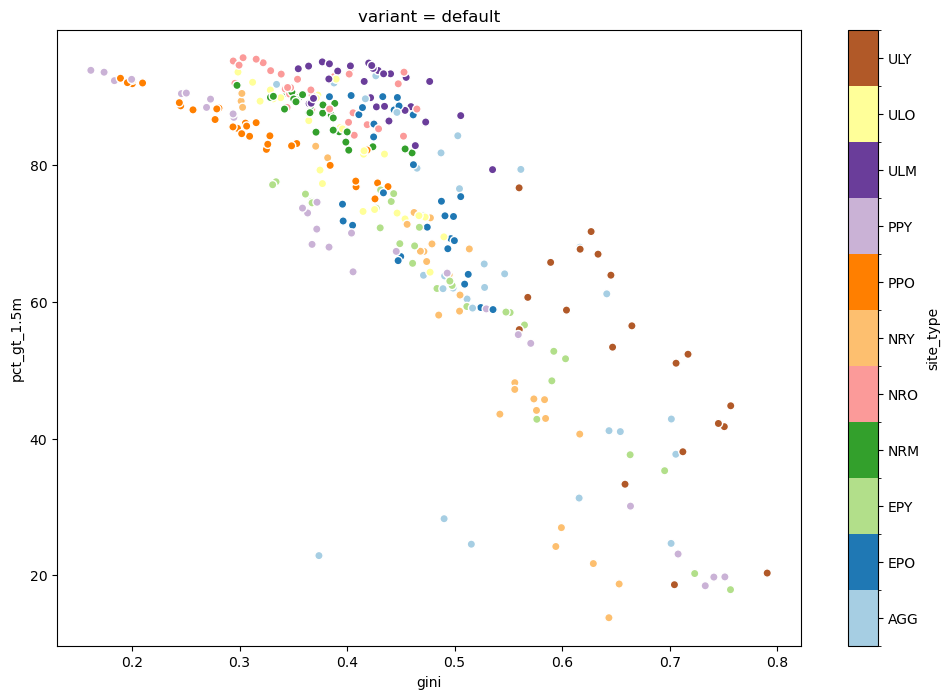

In [48]:
plt.figure(figsize=(12, 8)) 
plot_metrics.plot.scatter(y='pct_gt_1.5m', x='gini', hue='site_type', cmap="Paired")